# Example 3

This notebook computes total decay rates for a few models --- UNDER DEVELOPMENT!

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import DarkNews as dn
from DarkNews import *

In [3]:
import ToyAnalysis as ta

In [4]:
from DarkNews.GenLauncher import GenLauncher
kwargs={'m5': 0.15, 'm4': 0.1, 'mzprime': 0.03,'Umu5': 1.6e-5, 'Umu4': 1e-5, 'epsilon': 1e-3}
# kwargs={'m5': 0.15, 'm4': 0.075, 'mzprime': 1.25,'Umu5': 0.0, 'Umu4': 0.0, 'theta': 0.9e-1, 's_mu5': 1e-1, 'mhprime': 1.0}
gen_object = GenLauncher(exp="miniboone_fhc", HNLtype='dirac', loglevel="WARNING", neval=1e4, **kwargs)
df=gen_object.run()

Directory tree for this run already exists. Overriding it.


In [5]:
df['w_event_rate'].sum()

1894.8581592444723

In [6]:
for i in range(4):
    df['P_decay_ellell',i] = df['P_decay_ell_minus',f'{i}']+df['P_decay_ell_plus',f'{i}']
        

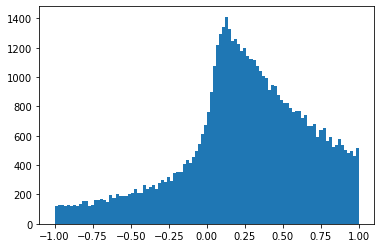

In [7]:
import DarkNews.fourvec as fv
_=plt.hist(fv.df_cos_opening_angle(df['P_decay_ellell'], df['P_recoil']), bins=100)

### MiniBooNE efficiencies


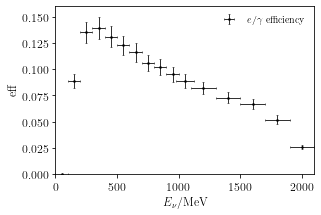

In [9]:
from scipy import interpolate

fig,ax = dn.plot_tools.std_fig()
enu_c, eff, err_eff = np.genfromtxt("aux_data/miniboone_eff/eg_effs.dat",unpack=True)
enu_w = (np.append(enu_c[1:],2200)-enu_c)
eff_func = interpolate.interp1d(enu_c, eff, fill_value=(eff[0],eff[-1]), bounds_error=False, kind='nearest')

kwargs={'facecolor': 'dodgerblue', 'edgecolor': 'None'}
ta.plot_tools.data_plot(ax, enu_c, enu_w, eff, err_eff/2, err_eff/2, label=r'$e/\gamma$ efficiency')
# ta.plot_tools.errorband_plot(ax, enu_c, enu_w, eff, err_eff/2, err_eff/2, label=r'$e/\gamma$ efficiency', **kwargs)
ax.legend(loc='upper right', )

ax.set_ylim(0,0.160)
ax.set_xlim(0,2100)
ax.set_xlabel(r"$E_\nu/$MeV")
ax.set_ylabel(r"eff")

dn.plot_tools.std_savefig(fig, 'plots/miniboone_effs.pdf')

In [13]:
x=ta.analysis.compute_spectrum(df)

P_projectile                       P_target                          \
                 0    1    2         3          0    1    2             3   
0         0.792762  0.0  0.0  0.792762   0.938272 -0.0 -0.0 -3.330669e-16   
1         0.832772  0.0  0.0  0.832772   0.938272 -0.0 -0.0  1.110223e-16   
2         0.925263  0.0  0.0  0.925263   0.938272 -0.0 -0.0  2.220446e-16   
3         1.230462  0.0  0.0  1.230462   0.938272 -0.0 -0.0  1.110223e-16   
4         0.493483  0.0  0.0  0.493483   0.938272 -0.0 -0.0  1.665335e-16   
...            ...  ...  ...       ...        ...  ...  ...           ...   
55823     0.247447  0.0  0.0  0.247447  11.174864 -0.0 -0.0  1.501577e-14   
55824     0.255980  0.0  0.0  0.255980   0.938272 -0.0 -0.0 -3.608225e-16   
55825     0.371818  0.0  0.0  0.371818   0.938272 -0.0 -0.0  2.775558e-16   
55826     0.622963  0.0  0.0  0.622963  11.174864 -0.0 -0.0  3.641532e-14   
55827     1.057596  0.0  0.0  1.057596   0.938272 -0.0 -0.0 -3.330669e-16   

        P_recoil            ... P_decay_ellell                                \
               0         1  ...              0         1         2         3   
0       0.938860  0.014360  ...       0.407366 -0.008657 -0.013978  0.405927   
1       0.938944 -0.026476  ...       0.248726  0.039140 -0.016382  0.243238   
2       0.938609  0.017305  ...       0.234583  0.016704 -0.021340  0.231073   
3       0.942800 -0.070690  ...       0.439197  0.045155  0.004512  0.435815   
4       0.938770 -0.016160  ...       0.246551  0.005159 -0.003481  0.244640   
...          ...       ...  ...            ...       ...       ...       ...   
55823  11.176204 -0.124552  ...       0.044836  0.019331  0.017695  0.020578   
55824   0.940207 -0.028496  ...       0.042831 -0.018898 -0.006543  0.023121   
55825   0.938994 -0.013654  ...       0.146514 -0.022156  0.004185  0.141626   
55826  11.174930 -0.024930  ...       0.054439 -0.000433  0.007327  0.044830   
55827   0.938361  0.007008  ...       0.210890 -0.001204 -0.029322  0.206672   

      reco_Enu    reco_w reco_Evis reco_theta_beam reco_costheta_beam  \
                                                                        
0          NaN  0.000000       NaN             NaN                NaN   
1      0.25135  0.002035  0.241477        6.842935           0.992877   
2      0.29316  0.002557  0.182963        9.042101           0.987573   
3      0.68265  0.001709  0.399930        7.825611           0.990687   
4          NaN  0.000000       NaN             NaN                NaN   
...        ...       ...       ...             ...                ...   
55823      NaN  0.000000       NaN             NaN                NaN   
55824      NaN  0.000000       NaN             NaN                NaN   
55825      NaN  0.000000       NaN             NaN                NaN   
55826      NaN  0.000000       NaN             NaN                NaN   
55827      NaN  0.000000       NaN             NaN                NaN   

       reco_eff  
                 
0      0.110612  
1      0.110612  
2      0.110612  
3      0.110612  
4      0.110612  
...         ...  
55823  0.110612  
55824  0.110612  
55825  0.110612  
55826  0.110612  
55827  0.110612  

[55828 rows x 55 columns]